In [200]:
import torch
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# get all words
words = open('names.txt', 'r').read().splitlines()
words[:15]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella']

In [4]:
chars = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i, s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s = {i:s for s, i in s_to_i.items()}
print(f's to i: {s_to_i}\n\ni to s: {i_to_s}')

s to i: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}

i to s: {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build dataset

block_size = 3 # set context length - char used to predict the next char
X, Y = [], []
for word in words[:5]:
    print(word)
    context = [0] * block_size

    for char in word + '.':
        ix = s_to_i[char]
        X.append(context)
        Y.append(ix)
        print(''.join(i_to_s[i] for i in context), '->', i_to_s[ix])
        context = context[1:] + [ix] # crop first character and append next

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... -> e
..e -> m
.em -> m
emm -> a
mma -> .
olivia
... -> o
..o -> l
.ol -> i
oli -> v
liv -> i
ivi -> a
via -> .
ava
... -> a
..a -> v
.av -> a
ava -> .
isabella
... -> i
..i -> s
.is -> a
isa -> b
sab -> e
abe -> l
bel -> l
ell -> a
lla -> .
sophia
... -> s
..s -> o
.so -> p
sop -> h
oph -> i
phi -> a
hia -> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
# embed characters in an n dimensional space
C = torch.randn((27, 2))
C

tensor([[-1.3997,  0.8714],
        [-2.2666, -0.9395],
        [-0.9915,  0.2474],
        [-0.6085,  1.1396],
        [ 0.7536, -0.5310],
        [ 0.5357,  1.4896],
        [ 1.2175,  0.3290],
        [-0.0746,  0.4567],
        [-1.5059,  0.4995],
        [-0.1255, -1.4371],
        [ 0.2604,  0.3202],
        [ 1.7413,  0.1851],
        [-0.9045, -0.1870],
        [ 0.8171, -0.2165],
        [ 0.3607,  0.0276],
        [ 0.5823,  0.8169],
        [ 0.9996,  0.0930],
        [ 0.3645, -0.0678],
        [ 1.3390, -0.7616],
        [ 2.0456, -0.4568],
        [ 2.2468, -0.8415],
        [ 0.1600, -0.1194],
        [ 1.7380, -0.0901],
        [ 0.9159,  0.3138],
        [-1.2944, -2.5827],
        [-1.4920, -1.2270],
        [-0.3904, -1.0287]])

In [12]:
# example vector for embedding the integer 5 in 2 dimensions (the relevant 2D row from C)
one_hot_5 = F.one_hot(torch.tensor(5), num_classes = 27).float()
one_hot_5 @ C

tensor([0.5357, 1.4896])

In [14]:
# index instead here, since it does the same thing and is simpler

# example, indexing with a list (actually tensor) of integers
C[torch.tensor([5, 6, 7, 8, 9, 9, 9])]

tensor([[ 0.5357,  1.4896],
        [ 1.2175,  0.3290],
        [-0.0746,  0.4567],
        [-1.5059,  0.4995],
        [-0.1255, -1.4371],
        [-0.1255, -1.4371],
        [-0.1255, -1.4371]])

In [28]:
# indexing with X (a multi dimensional tensor)
# simply maintains shape of filter variable, 
# and returns the relevant 2D return value for each integer within the tensor
emb = C[X]
print(emb.shape, '\n\n', emb)

torch.Size([32, 3, 2]) 

 tensor([[[-1.3997,  0.8714],
         [-1.3997,  0.8714],
         [-1.3997,  0.8714]],

        [[-1.3997,  0.8714],
         [-1.3997,  0.8714],
         [ 0.5357,  1.4896]],

        [[-1.3997,  0.8714],
         [ 0.5357,  1.4896],
         [ 0.8171, -0.2165]],

        [[ 0.5357,  1.4896],
         [ 0.8171, -0.2165],
         [ 0.8171, -0.2165]],

        [[ 0.8171, -0.2165],
         [ 0.8171, -0.2165],
         [-2.2666, -0.9395]],

        [[-1.3997,  0.8714],
         [-1.3997,  0.8714],
         [-1.3997,  0.8714]],

        [[-1.3997,  0.8714],
         [-1.3997,  0.8714],
         [ 0.5823,  0.8169]],

        [[-1.3997,  0.8714],
         [ 0.5823,  0.8169],
         [-0.9045, -0.1870]],

        [[ 0.5823,  0.8169],
         [-0.9045, -0.1870],
         [-0.1255, -1.4371]],

        [[-0.9045, -0.1870],
         [-0.1255, -1.4371],
         [ 1.7380, -0.0901]],

        [[-0.1255, -1.4371],
         [ 1.7380, -0.0901],
         [-0.1255, -1.4371

In [31]:
# initialise random weights
# 6 weights (3 integers in each input, each with 2 dimensions)
# 100 neurons (can be as many as you want)
W1 = torch.randn((6,100))
b1 = torch.randn(100)
W1, b1

(tensor([[-2.8176e+00, -5.3473e-03,  5.2759e-01,  1.0764e-01, -9.5916e-02,
          -1.1483e+00, -7.1257e-01,  8.1908e-01, -1.1475e+00,  1.0605e+00,
           6.8647e-01, -2.7760e-01,  8.4700e-01,  7.9825e-03, -1.1406e+00,
           2.4678e-01,  1.3954e-01,  7.8791e-01,  9.4598e-01, -1.0267e+00,
          -1.1389e+00,  9.1816e-01, -1.0027e+00,  9.9148e-02,  3.9956e-01,
          -7.3909e-01, -6.2308e-01, -7.8970e-01,  2.5112e-01,  1.3124e+00,
           1.5572e+00, -4.8928e-01,  4.0552e-01, -1.3850e+00, -9.5747e-01,
          -1.0630e-01,  1.0511e+00,  2.9598e-01,  6.6005e-02, -6.9742e-01,
           2.6241e-01, -1.7116e-01,  1.4736e+00,  1.4530e-01, -4.9747e-01,
           6.2003e-01,  3.7930e-01,  1.6248e+00,  7.2292e-02,  1.5603e-01,
          -9.0500e-01,  2.5980e+00,  9.3358e-01,  5.4507e-01,  2.8871e-01,
           1.0484e+00,  2.9753e-01,  2.5498e-01, -3.3138e-01, -4.4555e-01,
          -2.3618e-01,  7.9028e-01, -1.7519e+00, -5.5796e-01,  2.3288e+00,
          -8.7563e-01, -1

In [39]:
# turn embeddings from 32x3x2 to 32x6 so as to make multiplicable with 6x100 weights

# example taking each index of the 1th dimension and concatenating them
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

# each row in the below matrix (tensor) represents the concatenated 2 dimensions of each of the 3 integer inputs, 6 items total

tensor([[-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714,  0.5357,  1.4896],
        [-1.3997,  0.8714,  0.5357,  1.4896,  0.8171, -0.2165],
        [ 0.5357,  1.4896,  0.8171, -0.2165,  0.8171, -0.2165],
        [ 0.8171, -0.2165,  0.8171, -0.2165, -2.2666, -0.9395],
        [-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714,  0.5823,  0.8169],
        [-1.3997,  0.8714,  0.5823,  0.8169, -0.9045, -0.1870],
        [ 0.5823,  0.8169, -0.9045, -0.1870, -0.1255, -1.4371],
        [-0.9045, -0.1870, -0.1255, -1.4371,  1.7380, -0.0901],
        [-0.1255, -1.4371,  1.7380, -0.0901, -0.1255, -1.4371],
        [ 1.7380, -0.0901, -0.1255, -1.4371, -2.2666, -0.9395],
        [-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714, -2.2666, -0.9395],
        [-1.3997,  0.8714, -2.2666, -0.9395,  1.7380, -0.0901],
        [-2.2666, -0.9395,  1.7380, -0.0

In [35]:
# same thing using unbind, a built in method that performs the same operation as above
torch.cat(torch.unbind(emb, 1), 1)

# NB this is INefficient and creates new memory

tensor([[-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714,  0.5357,  1.4896],
        [-1.3997,  0.8714,  0.5357,  1.4896,  0.8171, -0.2165],
        [ 0.5357,  1.4896,  0.8171, -0.2165,  0.8171, -0.2165],
        [ 0.8171, -0.2165,  0.8171, -0.2165, -2.2666, -0.9395],
        [-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714,  0.5823,  0.8169],
        [-1.3997,  0.8714,  0.5823,  0.8169, -0.9045, -0.1870],
        [ 0.5823,  0.8169, -0.9045, -0.1870, -0.1255, -1.4371],
        [-0.9045, -0.1870, -0.1255, -1.4371,  1.7380, -0.0901],
        [-0.1255, -1.4371,  1.7380, -0.0901, -0.1255, -1.4371],
        [ 1.7380, -0.0901, -0.1255, -1.4371, -2.2666, -0.9395],
        [-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714, -2.2666, -0.9395],
        [-1.3997,  0.8714, -2.2666, -0.9395,  1.7380, -0.0901],
        [-2.2666, -0.9395,  1.7380, -0.0

In [40]:
# even more efficient...

# each tensor is actually stored as a 1d array (call with .storage)
# which can be reshaped with .view. so...
emb.view(32, 6)

tensor([[-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714,  0.5357,  1.4896],
        [-1.3997,  0.8714,  0.5357,  1.4896,  0.8171, -0.2165],
        [ 0.5357,  1.4896,  0.8171, -0.2165,  0.8171, -0.2165],
        [ 0.8171, -0.2165,  0.8171, -0.2165, -2.2666, -0.9395],
        [-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714,  0.5823,  0.8169],
        [-1.3997,  0.8714,  0.5823,  0.8169, -0.9045, -0.1870],
        [ 0.5823,  0.8169, -0.9045, -0.1870, -0.1255, -1.4371],
        [-0.9045, -0.1870, -0.1255, -1.4371,  1.7380, -0.0901],
        [-0.1255, -1.4371,  1.7380, -0.0901, -0.1255, -1.4371],
        [ 1.7380, -0.0901, -0.1255, -1.4371, -2.2666, -0.9395],
        [-1.3997,  0.8714, -1.3997,  0.8714, -1.3997,  0.8714],
        [-1.3997,  0.8714, -1.3997,  0.8714, -2.2666, -0.9395],
        [-1.3997,  0.8714, -2.2666, -0.9395,  1.7380, -0.0901],
        [-2.2666, -0.9395,  1.7380, -0.0

In [43]:
torch.cat(torch.unbind(emb, 1), 1) == emb.view(32, 6)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [45]:
# use .view to make tensor multiplicable with weights
h = emb.view(32, 6) @ W1 + b1
h

tensor([[ 6.5373, -4.3299,  4.4872,  ..., -2.0102,  1.3918,  1.5110],
        [ 5.9866, -3.6937,  0.5893,  ..., -3.5260, -1.2142,  1.2088],
        [ 6.8002, -0.5969, -3.1121,  ..., -3.6045, -0.1452, -2.1938],
        ...,
        [ 0.6387,  1.4448,  4.5237,  ...,  2.5997,  0.0757, -2.1137],
        [-4.5105, -1.6581, -1.0260,  ..., -2.0655, -2.0014,  2.3846],
        [ 0.6555,  3.7035,  3.6290,  ...,  4.3134,  5.2619,  4.8554]])

In [46]:
# now we have 100 activations for each of our 32 example rows
h.shape

torch.Size([32, 100])

In [47]:
# you can use -1 and have torch infer the missing value from the other value (ie here it will divide total by 6)
h = emb.view(-1, 6) @ W1 + b1

# NB b1 is treated as a 1, 100 tensor for broadcasting, i.e. the None below is filled with a 1
# 32, 100
#   , 100

In [48]:
h

tensor([[ 6.5373, -4.3299,  4.4872,  ..., -2.0102,  1.3918,  1.5110],
        [ 5.9866, -3.6937,  0.5893,  ..., -3.5260, -1.2142,  1.2088],
        [ 6.8002, -0.5969, -3.1121,  ..., -3.6045, -0.1452, -2.1938],
        ...,
        [ 0.6387,  1.4448,  4.5237,  ...,  2.5997,  0.0757, -2.1137],
        [-4.5105, -1.6581, -1.0260,  ..., -2.0655, -2.0014,  2.3846],
        [ 0.6555,  3.7035,  3.6290,  ...,  4.3134,  5.2619,  4.8554]])

In [58]:
# thorw on a tanh to get numbers between -1 and 1
h = torch.tanh(h)
h.shape, h

(torch.Size([32, 100]),
 tensor([[ 0.7616, -0.7614,  0.7615,  ..., -0.7464,  0.7082,  0.7197],
         [ 0.7616, -0.7611,  0.4849,  ..., -0.7609, -0.6847,  0.6839],
         [ 0.7616, -0.4891, -0.7599,  ..., -0.7610, -0.1432, -0.7511],
         ...,
         [ 0.5109,  0.7137,  0.7615,  ...,  0.7569,  0.0754, -0.7492],
         [-0.7615, -0.7306, -0.6483,  ..., -0.7480, -0.7461,  0.7544],
         [ 0.5193,  0.7611,  0.7610,  ...,  0.7614,  0.7616,  0.7615]]))

In [60]:
# create final layer, with 27 neurons (one per expected character)
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [61]:
W2.shape

torch.Size([100, 27])

In [62]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [67]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims = True)
prob

tensor([[4.2469e-09, 3.9972e-10, 3.4390e-02, 2.1981e-04, 7.4672e-06, 3.6955e-04,
         8.4889e-03, 6.5947e-03, 1.7825e-04, 3.4764e-06, 6.0090e-06, 9.9316e-06,
         1.1928e-03, 1.8529e-11, 8.2817e-10, 3.5958e-12, 4.6223e-04, 1.8455e-09,
         9.3182e-01, 6.6728e-11, 2.1677e-09, 6.0269e-11, 3.6979e-08, 3.9682e-03,
         6.3605e-05, 1.2227e-02, 8.8788e-08],
        [1.0572e-06, 4.9599e-12, 3.2749e-02, 6.9614e-05, 1.5023e-05, 3.6999e-03,
         9.7687e-03, 8.0657e-01, 3.6533e-04, 1.3141e-10, 5.3003e-12, 1.2252e-02,
         4.6293e-07, 2.7484e-12, 5.4100e-08, 9.7975e-06, 6.3137e-05, 2.8156e-10,
         6.8146e-02, 2.1762e-10, 6.3584e-10, 2.2448e-14, 2.1407e-08, 7.3273e-03,
         1.4642e-06, 5.8945e-02, 1.4228e-05],
        [6.1424e-14, 9.6855e-12, 2.1368e-04, 2.5888e-08, 5.3483e-02, 1.7216e-01,
         5.8263e-07, 2.7669e-06, 3.8393e-10, 3.8919e-06, 3.0818e-08, 1.1182e-03,
         1.0305e-06, 8.4637e-09, 6.3886e-07, 8.5902e-05, 1.6668e-05, 2.0321e-12,
         2.1173e-

In [74]:
# check rows sum to 1 
for i in range(5):
    print(prob[i].sum())
    n += 1

tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.)
tensor(1.0000)


In [76]:
# get probabilities for correct characters in Y by iterating over rows from arange and cols from Y
prob[torch.arange(32), Y]

tensor([3.6955e-04, 2.7484e-12, 8.4637e-09, 5.2423e-09, 9.3112e-02, 3.5958e-12,
        5.0196e-08, 4.4417e-09, 3.1436e-06, 7.1292e-09, 3.7183e-06, 9.7468e-01,
        3.9972e-10, 2.4528e-10, 2.9584e-10, 1.0556e-03, 3.4764e-06, 7.2712e-09,
        6.2001e-13, 4.9476e-09, 6.0622e-09, 1.2508e-08, 1.0183e-03, 8.4651e-10,
        1.2071e-04, 6.6728e-11, 8.7167e-01, 3.2001e-03, 1.0266e-08, 2.3892e-06,
        1.5084e-04, 8.9620e-02])

In [79]:
# get loss (neg log likelihood)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(14.9309)

In [ ]:
# NB - DON'T RUN THIS CELL > REFERENCE ONLY

# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims = True)
# loss = -prob[torch.arange(32), Y].log().mean()

# forward pass
emb = C[X]
h = emb.view(-1, 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2

# simplify code commented out above with cross entropy
# NB using cross entropy rather than the above is much more efficient as it avoids creating the extra steps in memory
# AND it is also more efficient in the backward pass as the expressions can take a simpler form (see _backward methods in tinygrad)
# AND it set the largest number to zero, which avoids any issues caused by large positive numbers generating results out of float range
loss = F.cross_entropy(logits, Y)
loss

In [94]:
# --- TIDY EVERYTHING UP ----
# Do it again, but better organised

In [ ]:
# set parameters

In [119]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) # embed chars
W1 = torch.randn((6, 100), generator = g) # set weights for first layer
b1 = torch.randn(100, generator = g) # set bias
W2 = torch.randn((100,27), generator = g) # set weights for output layer
b2 = torch.randn(27, generator = g) # set bias

# get param count
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

3481

In [120]:
# train!!!!!!!

In [121]:
for p in parameters:
    p.requires_grad = True # ensure all parameters take a gradient, so as to avoid throwing an error later

In [122]:
for _ in range (1001):
    
    # forward pass
    emb = C[X]
    h = emb.view(-1, 6) @ W1 + b1
    h = torch.tanh(h)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    if _ % 50 == 0:
        print(f'Loss at iter {_}: {loss.item()}')
    
    # backward pass
    for p in parameters:
        p.grad = None # set grads to zero
    loss.backward() # run backward pass

    # update
    l_rate = 0.1
    for p in parameters:
        p.data += -l_rate * p.grad

Loss at iter 0: 17.769712448120117
Loss at iter 50: 0.5532562732696533
Loss at iter 100: 0.33544865250587463
Loss at iter 150: 0.29326289892196655
Loss at iter 200: 0.278947651386261
Loss at iter 250: 0.27201709151268005
Loss at iter 300: 0.2678886950016022
Loss at iter 350: 0.2651398181915283
Loss at iter 400: 0.2631760239601135
Loss at iter 450: 0.26216965913772583
Loss at iter 500: 0.2635561525821686
Loss at iter 550: 0.2614544630050659
Loss at iter 600: 0.26018834114074707
Loss at iter 650: 0.2593032121658325
Loss at iter 700: 0.25861719250679016
Loss at iter 750: 0.2580500543117523
Loss at iter 800: 0.25756341218948364
Loss at iter 850: 0.2571393549442291
Loss at iter 900: 0.25676703453063965
Loss at iter 950: 0.25643783807754517
Loss at iter 1000: 0.25614601373672485


In [130]:
# compare logits max to Y for each of 32 examples
logits.max(1)[1], Y, logits.max(1)[1] == Y

(tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 tensor([False,  True,  True,  True,  True, False,  True,  True,  True,  True,
          True,  True, False,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True, False,  True,  True,  True,  True,
          True,  True]))

In [137]:
# get count of how often predicted Ys match Ys
tf_count = logits.max(1)[1] == Y

num_true = torch.sum(tf_count).item()
num_false = torch.numel(tf_count) - num_true

print("Count True: ", num_true)
print("Count False: ", num_false)

Count True:  28
Count False:  4


In [157]:
# ------------------
# rebuild dataset with full list of names
#-------------------

In [187]:
block_size = 3 # set context length - char used to predict the next char
X, Y = [], []
for word in words:
    # print(word)
    context = [0] * block_size

    for char in word + '.':
        ix = s_to_i[char]
        X.append(context)
        Y.append(ix)
        # print(''.join(i_to_s[i] for i in context), '->', i_to_s[ix])
        context = context[1:] + [ix] # crop first character and append next

X = torch.tensor(X)
Y = torch.tensor(Y)

X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228147, 3]), torch.int64, torch.Size([228147]), torch.int64)

In [188]:
# re-set parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) # embed chars
W1 = torch.randn((6, 100), generator = g) # set weights for first layer
b1 = torch.randn(100, generator = g) # set bias
W2 = torch.randn((100,27), generator = g) # set weights for output layer
b2 = torch.randn(27, generator = g) # set bias

# get param count
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

3481

In [189]:
for p in parameters:
    p.requires_grad = True # ensure all parameters take a gradient, so as to avoid throwing an error later

In [197]:
# train
for _ in range (1001):

    # batch data to reduce workload
    # get 32 random ints from the length of the dataset
    ix = torch.randint(0, X.shape[0], (32,)) # requires a tuple for last/third argument
        
    # forward pass
    emb = C[X[ix]] # gives 32x3x2
    h = emb.view(-1, 6) @ W1 + b1
    h = torch.tanh(h)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix]) # index into Y at same places as X
    if _ % 50 == 0:
        print(f'Loss at iter {_}: {loss.item()}')
    
    # backward pass
    for p in parameters:
        p.grad = None # set grads to zero
    loss.backward() # run backward pass

    # update
    l_rate = 0.1
    for p in parameters:
        p.data += -l_rate * p.grad

Loss at iter 0: 2.6463916301727295
Loss at iter 50: 2.5204718112945557
Loss at iter 100: 2.3512723445892334
Loss at iter 150: 2.658916473388672
Loss at iter 200: 2.710153341293335
Loss at iter 250: 2.325740098953247
Loss at iter 300: 2.1935274600982666
Loss at iter 350: 2.3814878463745117
Loss at iter 400: 2.2085306644439697
Loss at iter 450: 2.5548295974731445
Loss at iter 500: 2.3467423915863037
Loss at iter 550: 2.459219455718994
Loss at iter 600: 2.4717750549316406
Loss at iter 650: 2.294051170349121
Loss at iter 700: 2.5084590911865234
Loss at iter 750: 2.158907651901245
Loss at iter 800: 2.70951509475708
Loss at iter 850: 2.356917142868042
Loss at iter 900: 2.798311710357666
Loss at iter 950: 2.596365451812744
Loss at iter 1000: 2.6325883865356445


In [244]:
# NB I get unstable loss minimisation when running on smaller batches
# not sure it was clear in K's video as he wasn't printing out iterations
# in fact, he later plots the batched training run, and there is a lot of noise in the loss

In [178]:
# NB - DON'T RUN THIS CELL > REFERENCE ONLY


# initial learning rate

# for finding initial learning rate

# lres = torch.linspace(-3, 0, 1000)
# lrs = 10**lres
# lrs

# THEN run above iteration with l_rate at i in lrs each time, appending the rate and loss to empty lists lr_i and loss_i

# then plt.plot(lr_i, loss_i) to identify the l_rate that gave the lowest loss, and take that as your starting l_rate
# it ended up being about 0.1 in this case

In [198]:
# --------------

# Split into train, dev, test sets

# --------------

In [224]:
def build_dataset(words):
    block_size = 3 
    X, Y = [], []
    for word in words:
        # print(word)
        context = [0] * block_size
    
        for char in word + '.':
            ix = s_to_i[char]
            X.append(context)
            Y.append(ix)
            # print(''.join(i_to_s[i] for i in context), '->', i_to_s[ix])
            context = context[1:] + [ix] # crop first character and append next
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    
    print(f'X shape: {X.shape} \tX dtype: {X.dtype} \tY shape: {Y.shape} \tY dtype: {Y.dtype}')
    return X, Y

In [225]:
# set train, dev, test sets

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_trn, Y_trn = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_tst, Y_tst = build_dataset(words[n2:])

X shape: torch.Size([182557, 3]) 	X dtype: torch.int64 	Y shape: torch.Size([182557]) 	Y dtype: torch.int64
X shape: torch.Size([22772, 3]) 	X dtype: torch.int64 	Y shape: torch.Size([22772]) 	Y dtype: torch.int64
X shape: torch.Size([22818, 3]) 	X dtype: torch.int64 	Y shape: torch.Size([22818]) 	Y dtype: torch.int64


In [226]:
# re-set parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) # embed chars
W1 = torch.randn((6, 100), generator = g) # set weights for first layer
b1 = torch.randn(100, generator = g) # set bias
W2 = torch.randn((100,27), generator = g) # set weights for output layer
b2 = torch.randn(27, generator = g) # set bias

# get param count
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

3481

In [227]:
for p in parameters:
    p.requires_grad = True # ensure all parameters take a gradient, so as to avoid throwing an error later

In [239]:
# train
for _ in range (30001):

    # batch data to reduce workload
    # get 32 random ints from the length of the dataset
    ix = torch.randint(0, X_trn.shape[0], (32,)) # requires a tuple for last/third argument
        
    # forward pass
    emb = C[X_trn[ix]] # gives 32x3x2
    h = emb.view(-1, 6) @ W1 + b1
    h = torch.tanh(h)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_trn[ix]) # index into Y at same places as X
    if _ % 2500 == 0:
        print(f'Loss at iter {_}: {loss.item()}')
    
    # backward pass
    for p in parameters:
        p.grad = None # set grads to zero
    loss.backward() # run backward pass

    # update
    l_rate = 0.1
    for p in parameters:
        p.data += -l_rate * p.grad

Loss at iter 0: 2.152848482131958
Loss at iter 2500: 2.2199957370758057
Loss at iter 5000: 2.2113962173461914
Loss at iter 7500: 2.381082534790039
Loss at iter 10000: 2.1640560626983643
Loss at iter 12500: 2.2385575771331787
Loss at iter 15000: 2.2476634979248047
Loss at iter 17500: 2.632511615753174
Loss at iter 20000: 2.097229242324829
Loss at iter 22500: 2.3477840423583984
Loss at iter 25000: 2.445328712463379
Loss at iter 27500: 2.514782428741455
Loss at iter 30000: 2.615600109100342


In [240]:
# evaluate with dev sets
# NB - NN has not seen these examples at all, they're out of distribution
# loss is nonetheless similar to the training set after several training iterations on the model

emb = C[X_dev] # gives 32x3x2
h = emb.view(-1, 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev) # index into Y at same places as X
loss

tensor(2.3002, grad_fn=<NllLossBackward0>)

In [241]:
# compare training set to look for over-fitting

emb = C[X_trn] # gives 32x3x2
h = emb.view(-1, 6) @ W1 + b1
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_trn) # index into Y at same places as X
loss

tensor(2.2808, grad_fn=<NllLossBackward0>)

In [242]:
# --------------

# Scale up the model!

# --------------

In [243]:
# re-set parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g) 
W1 = torch.randn((6, 300), generator = g) # increase number of neurons to 300
b1 = torch.randn(300, generator = g) 
W2 = torch.randn((300,27), generator = g) 
b2 = torch.randn(27, generator = g) 

# get param count
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

10281

In [256]:
for p in parameters:
    p.requires_grad = True 

In [248]:
# train, tracking step and loss
step_i = []
loss_i = []

for _ in range (30001):

    # batch data to reduce workload
    # get 32 random ints from the length of the dataset
    ix = torch.randint(0, X_trn.shape[0], (32,)) # requires a tuple for last/third argument
        
    # forward pass
    emb = C[X_trn[ix]] # gives 32x3x2
    h = emb.view(-1, 6) @ W1 + b1
    h = torch.tanh(h)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_trn[ix]) # index into Y at same places as X
    if _ % 2500 == 0:
        print(f'Loss at iter {_}: {loss.item()}')
    
    # backward pass
    for p in parameters:
        p.grad = None # set grads to zero
    loss.backward() # run backward pass

    # update
    l_rate = 0.1
    for p in parameters:
        p.data += -l_rate * p.grad

    step_i.append(_)
    loss_i.append(loss.item())

Loss at iter 0: 2.882796049118042
Loss at iter 2500: 2.8597898483276367
Loss at iter 5000: 2.750373601913452
Loss at iter 7500: 2.1017589569091797
Loss at iter 10000: 2.3941237926483154
Loss at iter 12500: 2.3557114601135254
Loss at iter 15000: 2.452397584915161
Loss at iter 17500: 2.2264106273651123
Loss at iter 20000: 2.712479591369629
Loss at iter 22500: 2.186692237854004
Loss at iter 25000: 2.422085762023926
Loss at iter 27500: 2.4977028369903564
Loss at iter 30000: 2.609978437423706


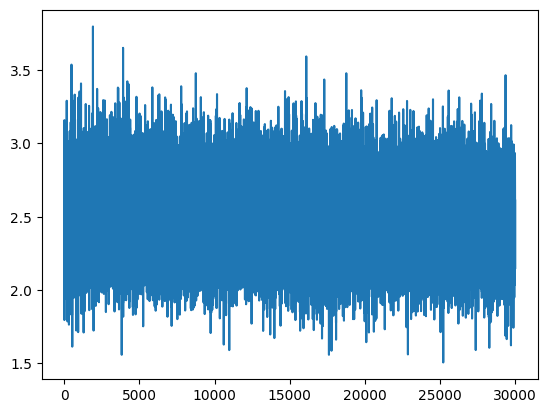

In [249]:
plt.plot(step_i, loss_i)

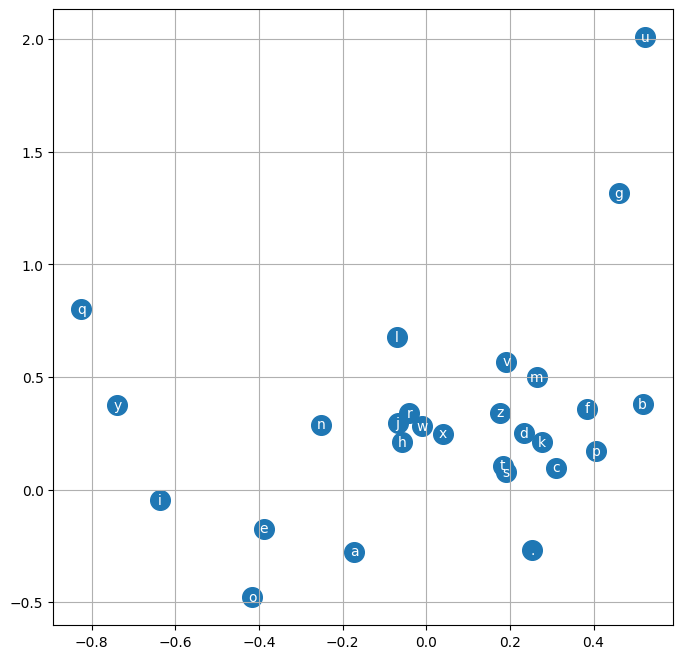

In [252]:
# visualise embedding of all characters

plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), i_to_s[i], ha = "center", va = "center", color = "white")
plt.grid('minor')

# NB vowels are mostly together (u is most definitely not! maybe its connection with q??)
# plosives are mostly together, dento-labials are mostly together, etc

In [253]:
# --------------

# Increase embedding dimensions

# --------------

In [260]:
# re-set parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator = g) # increase dimensions from 2 to 10
W1 = torch.randn((30, 300), generator = g) # increase weight dimension five-fold correspondingly
b1 = torch.randn(300, generator = g) 
W2 = torch.randn((300,27), generator = g) 
b2 = torch.randn(27, generator = g) 

# get param count
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)

17697

In [261]:
for p in parameters:
    p.requires_grad = True 

In [262]:
# put empty lists in separate cell to avoid re-initialising with each run and overwriting values
step_i = []
loss_i = []

In [273]:
# train
for _ in range (50001):
    ix = torch.randint(0, X_trn.shape[0], (32,))
        
    # forward pass
    emb = C[X_trn[ix]] # gives 32x3x2
    
    # update below from 6 to 30 (as above, so below)
    # this should NOT actually be a hard number at all, but should respond dynamically to inputs generated above
    h = emb.view(-1, 30) @ W1 + b1
    h = torch.tanh(h)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_trn[ix]) 
    if _ % 2500 == 0:
        print(f'Loss at iter {_}: {loss.item()}')
    
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward() 

    # update
    l_rate = 0.01 # note learning rate was first run at 0.1, then updated to 0.01 for second run!!
    for p in parameters:
        p.data += -l_rate * p.grad

    step_i.append(_)
    loss_i.append(loss.log10().item()) # append log loss rather than loss in order to visualise more clearly

Loss at iter 0: 1.8959976434707642
Loss at iter 2500: 2.0427191257476807
Loss at iter 5000: 2.292581081390381
Loss at iter 7500: 2.012442111968994
Loss at iter 10000: 2.0150697231292725
Loss at iter 12500: 2.2752223014831543
Loss at iter 15000: 1.8872194290161133
Loss at iter 17500: 2.1066362857818604
Loss at iter 20000: 2.1780455112457275
Loss at iter 22500: 2.2877566814422607
Loss at iter 25000: 1.8930810689926147
Loss at iter 27500: 2.458498954772949
Loss at iter 30000: 2.2242722511291504
Loss at iter 32500: 2.274414539337158
Loss at iter 35000: 2.325819253921509
Loss at iter 37500: 1.8851491212844849
Loss at iter 40000: 1.9920815229415894
Loss at iter 42500: 2.00685453414917
Loss at iter 45000: 2.219402551651001
Loss at iter 47500: 2.1533310413360596
Loss at iter 50000: 2.472064256668091


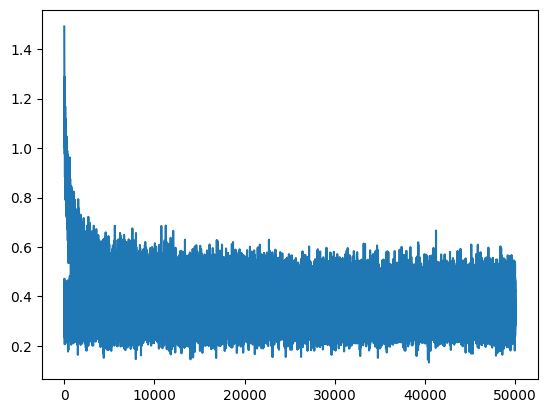

In [274]:
plt.plot(step_i, loss_i) # doesnt work perfectly as currently set as it plots two or more runs on top of each other

In [275]:
emb = C[X_trn]
h = emb.view(-1, 30) @ W1 + b1 # update from 6 to 30
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_trn) # index into Y at same places as X
loss

tensor(2.1729, grad_fn=<NllLossBackward0>)

In [276]:
emb = C[X_dev]
h = emb.view(-1, 30) @ W1 + b1 # update from 6 to 30
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev) # index into Y at same places as X
loss

tensor(2.2293, grad_fn=<NllLossBackward0>)

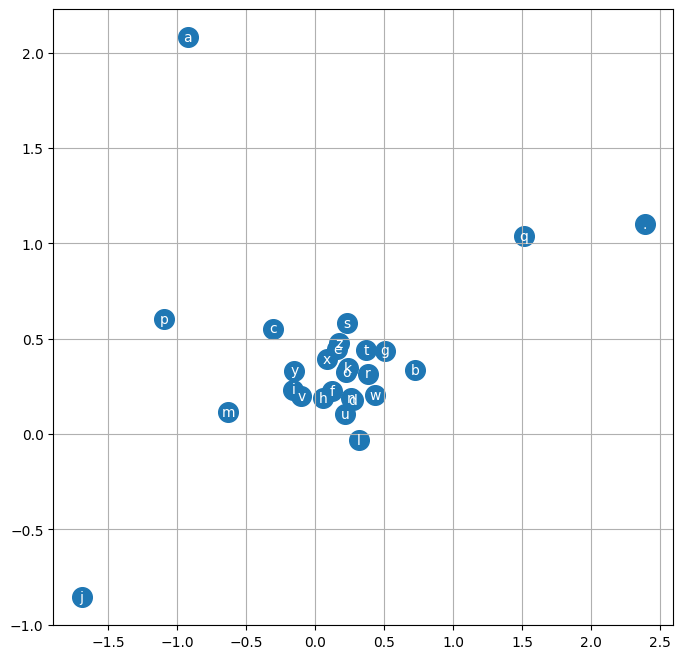

In [272]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), i_to_s[i], ha = "center", va = "center", color = "white")
plt.grid('minor')

# NB embeddings this time are actually much weirder and less 'sensible'
# NB probably because we're training in ten dimensions and plotting in two??

In [294]:
# fun part, let's generate some names

# sample from the model
g = torch.Generator().manual_seed(2147483647 + 23)

for _ in range(20):
    out = []
    context = [18, 15, 2]
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(i_to_s[i] for i in out))

ani.
.
ertir.
enjannaesharlan.
erishiv.
.
in.
ar.
en.
ellary.
adee.
ilareone.
ee.
.
ealthekontleysamarden.
ar.
ea.
i.
emg.
byhlanraike.


In [296]:
# --------------

# Beat Karpathy?!?!
#     Set up hyperparameters and test model performance over diff HPs

# --------------

In [98]:
# set imports here to run this section without running from cell 1
# (also imported numpy to calculate the loss MA - not previously imported)

import torch
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
# no. of chars used in context
block_size = 4

# dimensionality of embedding table
emb_dims = 100
n_weights = block_size * emb_dims

# no. of neurons
n_neurons = 500

# size of batches
batch_size = 100

# number of training runs
train_runs = 30001

# learning rate
l_rate_init = 0.1

#     learning rate decay
decay_factor = 0.99999

# others
# ???

In [121]:
# get all words
words = open('names.txt', 'r').read().splitlines()


# get indexes between chars and ints
chars = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i, s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s = {i:s for s, i in s_to_i.items()}
print(f'First 15 words: {words[:15]}\n\ns to i: {s_to_i}\n\ni to s: {i_to_s}')

First 15 words: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella']

s to i: {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}

i to s: {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [122]:
# define func for building dataset

def build_dataset(words, block_size):
    block_size = block_size
    X, Y = [], []
    for word in words:
        # print(word)
        context = [0] * block_size
    
        for char in word + '.':
            ix = s_to_i[char]
            X.append(context)
            Y.append(ix)
            # print(''.join(i_to_s[i] for i in context), '->', i_to_s[ix])
            context = context[1:] + [ix] # crop first character and append next
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    
    print(f'X shape: {X.shape} \tX dtype: {X.dtype} \tY shape: {Y.shape} \tY dtype: {Y.dtype}')
    return X, Y

In [123]:
# set train, dev, test sets

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_trn, Y_trn = build_dataset(words[:n1], block_size)
X_dev, Y_dev = build_dataset(words[n1:n2], block_size)
X_tst, Y_tst = build_dataset(words[n2:], block_size)

X shape: torch.Size([182606, 4]) 	X dtype: torch.int64 	Y shape: torch.Size([182606]) 	Y dtype: torch.int64
X shape: torch.Size([22697, 4]) 	X dtype: torch.int64 	Y shape: torch.Size([22697]) 	Y dtype: torch.int64
X shape: torch.Size([22844, 4]) 	X dtype: torch.int64 	Y shape: torch.Size([22844]) 	Y dtype: torch.int64


In [124]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, emb_dims), generator = g)
W1 = torch.randn((n_weights, n_neurons), generator = g)
b1 = torch.randn(n_neurons, generator = g) 
W2 = torch.randn((n_neurons,27), generator = g) 
b2 = torch.randn(27, generator = g) 

# get param count
parameters = [C, W1, b1, W2, b2]
print(f'No. parameters: {sum(p.nelement() for p in parameters)}')

No. parameters: 216727


In [125]:
for p in parameters:
    p.requires_grad = True 

In [126]:
# put empty lists in separate cell to avoid re-initialising with each run and overwriting values
step_i = []
loss_i = []
log_loss_i = []

In [127]:
# train
for _ in range (train_runs):
    ix = torch.randint(0, X_trn.shape[0], (batch_size,))
        
    # forward pass
    emb = C[X_trn[ix]] # gives batch_size x 3 x 2
    h = emb.view(-1, n_weights) @ W1 + b1
    h = torch.tanh(h)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_trn[ix]) 
        
    # backward pass
    for p in parameters:
        p.grad = None 
    loss.backward() 

    # update
    l_rate = l_rate_init * (decay_factor ** _) 
       
    for p in parameters:
        p.data += -l_rate * p.grad

    step_i.append(_)
    loss_i.append(loss) 
    log_loss_i.append(loss.log10().item()) 
    
    if _ % 250 == 0:
        print(f'Iter: {_}\t'
              f'L_rate: {round(l_rate, 5)}\t'
              f'Loss: {round(loss.item(), 5)}\t'
              f'Loss MA10: {round(np.mean([l.detach().numpy() for l in loss_i[-10:]]), 5)}')

Iter: 0	L_rate: 0.1	Loss: 43.15667	Loss MA10: 43.15665817260742
Iter: 250	L_rate: 0.09975	Loss: 13.04149	Loss MA10: 12.979040145874023
Iter: 500	L_rate: 0.0995	Loss: 12.67237	Loss MA10: 10.219929695129395
Iter: 750	L_rate: 0.09925	Loss: 7.93455	Loss MA10: 8.483699798583984
Iter: 1000	L_rate: 0.099	Loss: 9.1601	Loss MA10: 8.02575969696045
Iter: 1250	L_rate: 0.09876	Loss: 7.6134	Loss MA10: 7.083660125732422
Iter: 1500	L_rate: 0.09851	Loss: 7.12833	Loss MA10: 6.447909832000732
Iter: 1750	L_rate: 0.09827	Loss: 7.26785	Loss MA10: 6.376309871673584
Iter: 2000	L_rate: 0.09802	Loss: 5.29904	Loss MA10: 5.846660137176514
Iter: 2250	L_rate: 0.09778	Loss: 6.77164	Loss MA10: 5.283780097961426
Iter: 2500	L_rate: 0.09753	Loss: 5.21994	Loss MA10: 4.914720058441162
Iter: 2750	L_rate: 0.09729	Loss: 4.91169	Loss MA10: 5.023290157318115
Iter: 3000	L_rate: 0.09704	Loss: 4.23473	Loss MA10: 4.793399810791016
Iter: 3250	L_rate: 0.0968	Loss: 4.47794	Loss MA10: 4.698699951171875
Iter: 3500	L_rate: 0.09656	Loss:

Iter: 29000	L_rate: 0.07483	Loss: 2.21061	Loss MA10: 2.2892000675201416
Iter: 29250	L_rate: 0.07464	Loss: 2.01039	Loss MA10: 2.2193799018859863
Iter: 29500	L_rate: 0.07445	Loss: 2.21498	Loss MA10: 2.2223799228668213
Iter: 29750	L_rate: 0.07427	Loss: 2.55403	Loss MA10: 2.1352100372314453
Iter: 30000	L_rate: 0.07408	Loss: 2.01135	Loss MA10: 2.1598498821258545


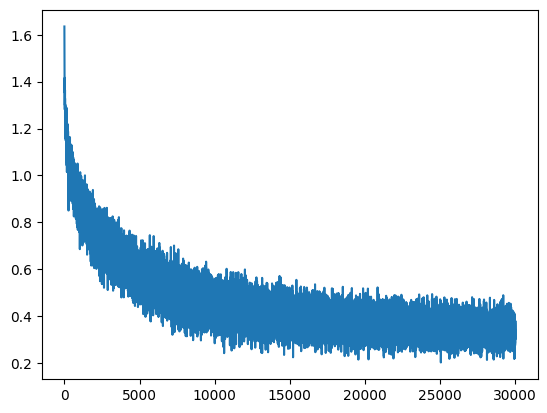

In [128]:
plt.plot(step_i, log_loss_i)

In [130]:
emb = C[X_trn]
h = emb.view(-1, n_weights) @ W1 + b1 
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_trn) 
loss

tensor(2.1590, grad_fn=<NllLossBackward0>)

In [131]:
emb = C[X_dev]
h = emb.view(-1, n_weights) @ W1 + b1 
h = torch.tanh(h)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.5599, grad_fn=<NllLossBackward0>)

In [133]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 2304)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(i_to_s[i] for i in out))

anaysson.
anov.
brisandrik.
nyairahe.
cazikashana.
kalikadon.
karlos.
dailanah.
anaan.
soubachura.
dena.
malyah.
avan.
aiklipal.
sylveralden.
davia.
khaniyah.
cari.
kinzie.
dalay.
